<a href="https://colab.research.google.com/github/janiosl/python.ds/blob/master/ml/cursoPyML/PyML_03_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python DS: Curso de Aprendizado de Máquina com Python

# Aula 03: Clustering

* Aulas disponíveis em: https://www.youtube.com/playlist?list=PL0XxTDj23A1HYVt2EOttKvaE8UzQoAh3A

* Alguns exemplos foram adaptados a partir de desafios propostos nas disciplinas Mineração de Dados, ministrada pelo Prof. Eduardo Ogasawara e Aprendizado de Máquina, ministrada pelo Prof. Eduardo Bezerra, ambas disciplinas do Mestrado em Ciência da Computação com ênfase em Ciência de Dados do [Programa PPCIC do CEFET/RJ](https://eic.cefet-rj.br/ppcic/).

##1 Introdução

Exemplo ilustrativo de aplicação do agrupamento com base no algoritmo k-Means:



1.   **Dados originais fictícios: localização geográfica de clientes**


![](https://github.com/janiosl/python.ds/blob/master/ml/cursoPyML/images/07_k-means01.PNG?raw=true)

Figura 01: Dados brutos

2.   **Identificação dos $k$ centróides, neste caso $k=3$, definido arbitrariamente como um parâmetro do modelo**

![](https://github.com/janiosl/python.ds/blob/master/ml/cursoPyML/images/07_k-means02_01.PNG?raw=true)

Figura 02: Centróide 1

![](https://github.com/janiosl/python.ds/blob/master/ml/cursoPyML/images/07_k-means02_02.PNG?raw=true)

Figura 03: Centróide 2

![](https://github.com/janiosl/python.ds/blob/master/ml/cursoPyML/images/07_k-means02_03.PNG?raw=true)

Figura 04: Centróide 3

3.   **Definição dos $k$ grupos de acordo com a proximidade dos pontos individiuais em relação a cada centróide.**

![](https://github.com/janiosl/python.ds/blob/master/ml/cursoPyML/images/07_k-means03.PNG?raw=true)

Figura 05: $k$ grupos definidos pelo modelo

## 2 Obtendo dados e preparando dados

In [ ]:
#Importação do módulo desejado
from google.colab import files

In [ ]:
#Realizar upload
carregados = files.upload()

#Exibição do resultado do upoload
for fn in carregados.keys():
  name = fn
  tamanho = len(carregados[fn])
  print(f'\nArquivo carregado: {name}\nTamanho: {tamanho} bytes')

Saving ex7data2.mat to ex7data2 (1).mat

Arquivo carregado: ex7data2.mat
Tamanho: 4784 bytes


In [ ]:
#Biblioteca para carga dos dados
import scipy.io as spio

In [ ]:
#Dataset de exemplo disponível em: 'https://github.com/MLRG-CEFET-RJ/ml-class/raw/master/ml-t2/data/ex7data2.mat'
arquivo = 'ex7data2.mat'
colunas = ['X']

In [ ]:
raw_mat = spio.loadmat(arquivo)
X = raw_mat.get('X')

In [ ]:
X[:5]

array([[1.84207953, 4.6075716 ],
       [5.65858312, 4.79996405],
       [6.35257892, 3.2908545 ],
       [2.90401653, 4.61220411],
       [3.23197916, 4.93989405]])

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

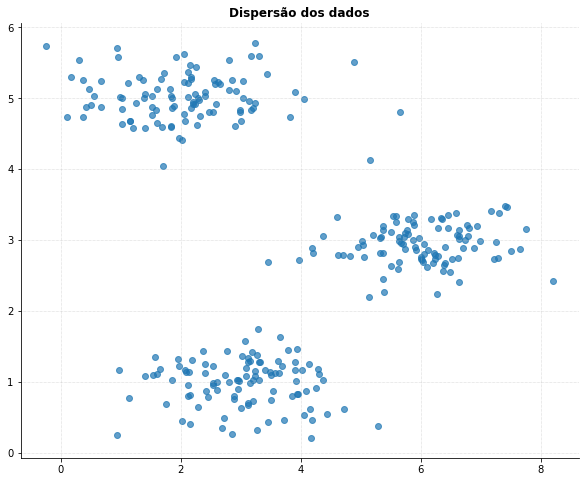

In [ ]:
plt.figure(figsize=(10,8))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Dispersão dos dados
plt.scatter(X[:, 0], X[:, 1], marker='o', alpha=0.7)
plt.title('Dispersão dos dados', fontweight='bold')

sns.despine()

#plt.savefig('target/plot3.1.png')

## 3 Criando e treinando um modelo

In [ ]:
#Importando o algoritmo que será usado como base
from sklearn.cluster import KMeans

In [ ]:
#Criação do modelo
K = 3
kmeans = KMeans(n_clusters=K)

In [ ]:
#Conferência do moddelo
kmeans

KMeans(n_clusters=3)

In [ ]:
#Treinamento do modelo
kmeans.fit(X)

KMeans(n_clusters=3)

## 4 Aplicando o modelo treinado

In [ ]:
#Uso do modelo para predição dos grupos
y_pred = kmeans.predict(X)
y_pred

array([1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1], d

In [ ]:
#Identificação dos centroides de cada grupo
kmeans.cluster_centers_

array([[3.04367119, 1.01541041],
       [1.95399466, 5.02557006],
       [6.03366736, 3.00052511]])

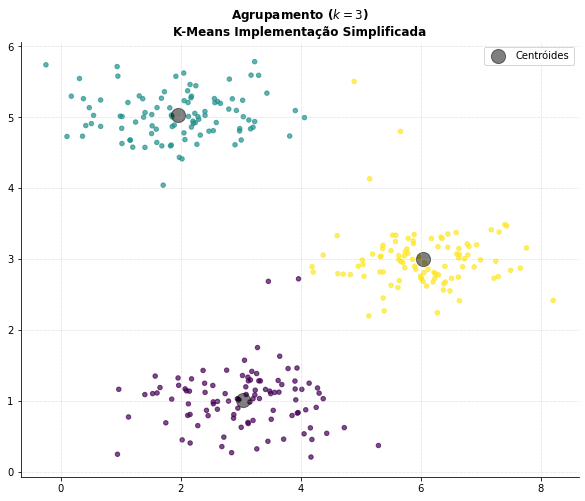

In [ ]:
#Visualização do resultado do agrupamento
plt.figure(figsize=(10,8))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Plotagem da dispersão com cores para diferenciar os grupos
#Neste gráfico usamos os grupos previstos para definir a cor dos grupos
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, cmap='viridis', alpha=0.7)


#Plotagem do centróide de cada grupo
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5,
            label='Centróides')

#Configurações visuais adicionais
plt.title('Agrupamento ($k=3$)\nK-Means Implementação Simplificada',
          fontweight='bold')

plt.legend()
sns.despine()

#plt.savefig('target/plot3.1.1.png')

## Referências

Bezerra, Eduardo (2016) **Introdução à Aprendizagem Profunda**. Disponível em: https://www.researchgate.net/publication/309321510_Introducao_a_Aprendizagem_Profunda, julho de 2020.

Géron, Aurélien (2019). **Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow:** Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Grus, Joel (2016). **Data Science do Zero:** Primeiras regras com Python. Traduzido por Welington Nascimento. Alta Books.

Han, Jiawei. Kamber, Micheline. Pei, Jian (2012) **Data Mining**: Concepts and techniques. Morgan Kaufmann, 3rd Edition.

McKinney, Wes (2018). **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.


---

**Leitura complementar e tutoriais**:
* Documentação Scikit-Learn sobre agrupamento: https://scikit-learn.org/stable/modules/clustering.html
* Playlist Mineração de Dados (Prof. Eduardo Ogasawara - Mestrado PPCIC): https://www.youtube.com/playlist?list=PLTy3TWJeueGw1eeP1cvaIiTzJrIljcVAq
* Tutorial sobre agrupamento (Prof. Eduardo Bezerra - Mestrado PPCIC): https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ml_clustering.ipynb
* Ilustração animada do algoritmo K-Means: http://shabal.in/visuals/kmeans/2.html
